Route: Goal 2 -> 2.4 XGBoost  
Purpose: to implement XGBoost on the processed data, and use SHAP to explain the model  
Kernel: Python

In [1]:
import pandas as pd
import numpy as np
import xgboost
import shap
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import train_test_split

In [2]:
bike = pd.read_csv('./DataSet/bike_final.csv')
X = bike.drop('Unnamed: 0', axis=1)
X = X.drop('final', axis=1)
X = X.drop('cnt', axis=1)
y = bike['final']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# 2.4.1 XGBoost(without tuning)

In [3]:
xgb_lcf = xgboost.XGBRegressor()
xgb_lcf.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [4]:
xgb_lcf.score(X,y)

0.9999815486807155

# 2.4.2 SHAP

In [5]:
def plot_sorted_value(shap_values,columns,numberth):
    #plt.rcParams['font.sans-serif'] = ['SimHei']
    #plt.rcParams['axes.unicode_minus'] = False
    shap_val = shap_values[numberth,:]
    df_row = pd.DataFrame(np.array(shap_val).reshape(1,-1),columns = columns)
    
    Weight_X0_local = df_row.iloc[0,0]
    Weight_X1_local = df_row.iloc[0,1]
    Weight_hum = 0
    Weight_windspeed = 0

    Weight_hum = bike_original.iloc[0,1] / np.sqrt((bike_original.iloc[0,1])**2 + (bike_original.iloc[0,2])**2) * Weight_X0_local + bike_original.iloc[1,1] / np.sqrt((bike_original.iloc[1,1])**2 + (bike_original.iloc[1,2])**2) * Weight_X1_local
    Weight_windspeed = bike_original.iloc[0,2] / np.sqrt((bike_original.iloc[0,1])**2 + (bike_original.iloc[0,2])**2) * Weight_X0_local + bike_original.iloc[1,2] / np.sqrt((bike_original.iloc[1,1])**2 + (bike_original.iloc[1,2])**2) * Weight_X1_local

    df_row = df_row.rename(columns={'X0':'hum','X1':'windspeed'})
    df_row.iloc[0,0] = Weight_hum
    df_row.iloc[0,1] = Weight_windspeed
    
    df_new = df_row.copy().abs()

    df_new = df_new.sort_values(by =0,axis = 1,ascending = False).iloc[:,:5]
    #print(type(df_row[df_new.columns].values[0]))
    plt.barh(np.flipud(df_new.columns),np.flipud(df_row[df_new.columns].values[0]))
    plt.xticks(rotation=90)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


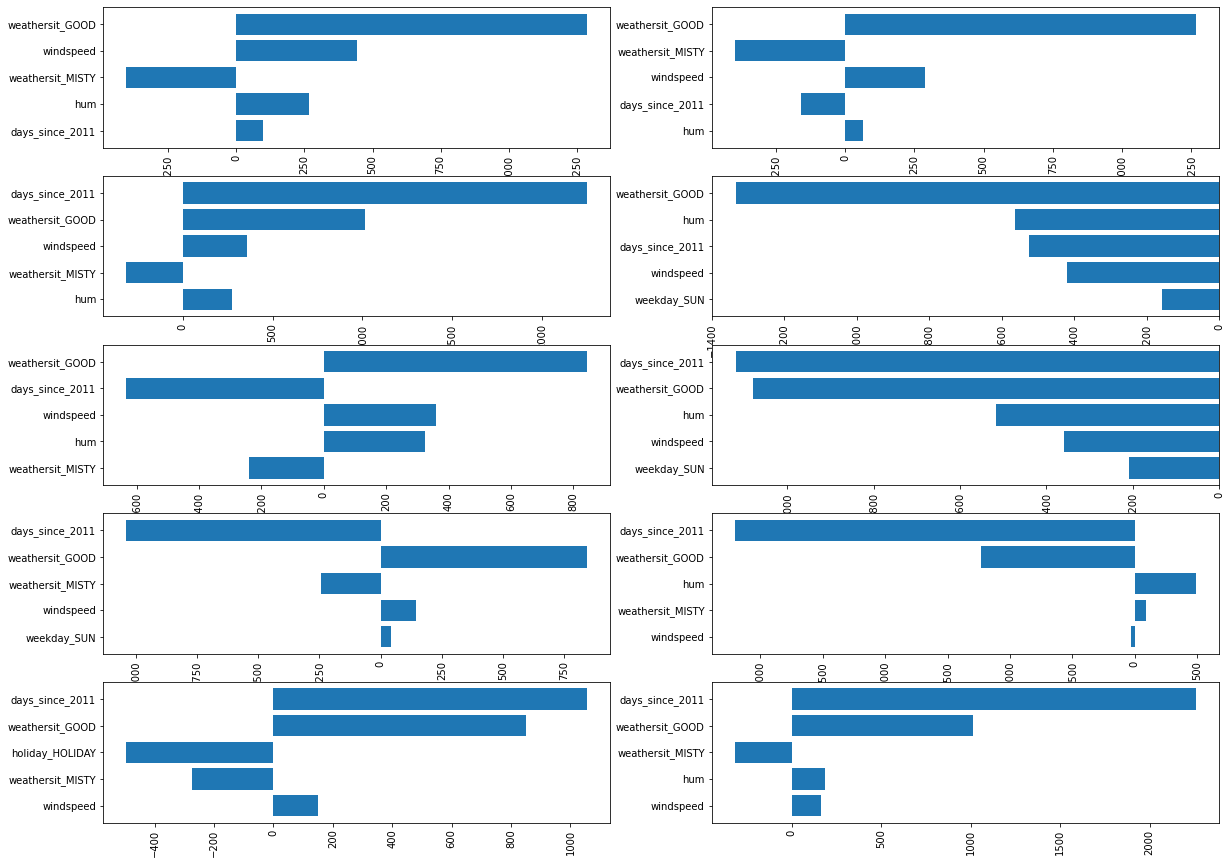

In [6]:
explainer = shap.TreeExplainer(xgb_lcf)
shap_values = explainer.shap_values(X)
bike_original = pd.read_csv('./DataSet/pca_components.csv')

fig = plt.figure(figsize =(20,15))
pic_num = 10
pic_num_range = [204, 244, 553, 275, 713, 114, 718, 32, 692, 552]
for i in range(pic_num):
    ax = fig.add_subplot(int(pic_num/2) if pic_num%2==0 else int(pic_num/2) +1,2,i+1)
    plot_sorted_value(shap_values,X.columns,pic_num_range[i]-1)